In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os

folder_path = "/content/drive/MyDrive/Natural Language Processing/HW3/emb_data"
filenames = os.listdir(folder_path)
documents = []

for file in filenames:
  try:
    with open(os.path.join(folder_path, file), 'r', encoding='utf-8') as f:
        documents.append(f.read())
  except:
    print(file)


article_100.txt


In [3]:
len(documents)
doc_str = ' '.join(documents)

In [4]:
!pip install sentence_transformers

In [5]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(documents)

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavio

I chose all-MiniLM-L6-v2, a BERT-based model, because it offers a great balance between efficiency and performance. It's lightweight, fast, and ideal for generating high-quality, contextual embeddings for large document corpora. Despite its small size, it captures semantic similarities well, making it suitable for tasks like document clustering. Its pre-training for sentence and document embeddings ensures good scalability and effectiveness in resource-constrained environments like Colab.

K-Means Silhouette Score: 0.12284903973340988


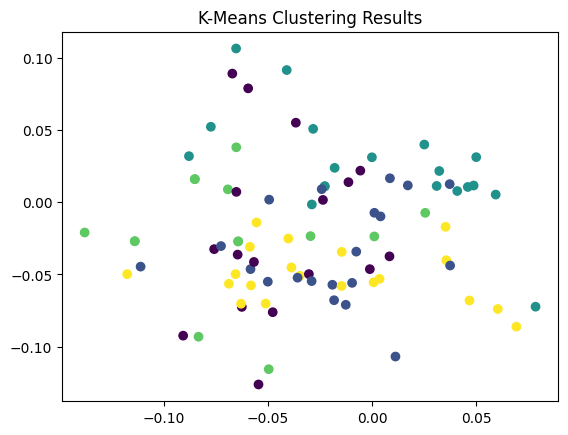

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

num_clusters = 5

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(embeddings)

labels = kmeans.labels_

silhouette_avg = silhouette_score(embeddings, labels)
print(f'K-Means Silhouette Score: {silhouette_avg}')

plt.scatter(embeddings[:, 0], embeddings[:, 1], c=labels, cmap='viridis')
plt.title('K-Means Clustering Results')
plt.show()

I chose cosine similarity because it measures how similar two documents are based on their content, regardless of their size or length. It's a simple and effective way to group documents that are closely related in meaning, which makes it ideal for clustering tasks like this one.

DBSCAN Silhouette Score: 0.04281741753220558


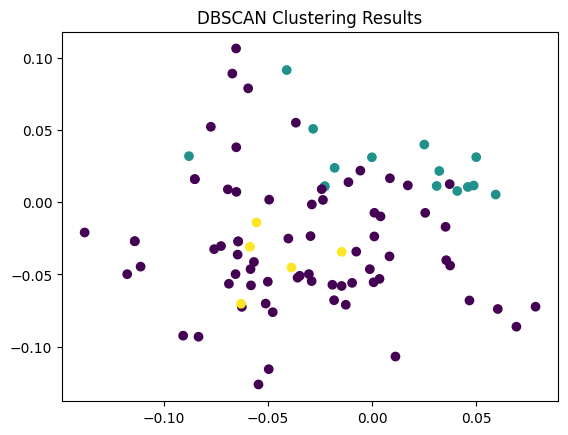

In [7]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5, metric='cosine')  # 'eps' and 'min_samples' can be tuned
dbscan_labels = dbscan.fit_predict(embeddings)

dbscan_silhouette_score = silhouette_score(embeddings, dbscan_labels)
print(f'DBSCAN Silhouette Score: {dbscan_silhouette_score}')

plt.scatter(embeddings[:, 0], embeddings[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering Results')
plt.show()


GMM Silhouette Score: 0.12284903973340988


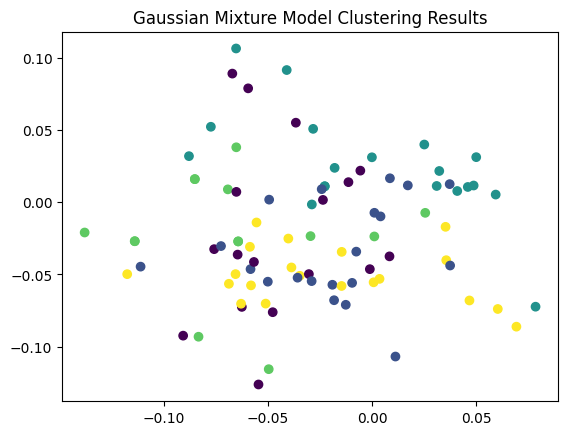

In [8]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=5, covariance_type='full', random_state=42)
gmm_labels = gmm.fit_predict(embeddings)

gmm_silhouette_score = silhouette_score(embeddings, gmm_labels)
print(f'GMM Silhouette Score: {gmm_silhouette_score}')

plt.scatter(embeddings[:, 0], embeddings[:, 1], c=gmm_labels, cmap='viridis')
plt.title('Gaussian Mixture Model Clustering Results')
plt.show()

          0         1         2         3         4         5         6   \
0   1.000000  0.043651  0.329527  0.030252  0.067896  0.044202  0.084180   
1   0.043651  1.000000  0.109277  0.151102 -0.043264  0.357018 -0.131528   
2   0.329527  0.109277  1.000000 -0.030321 -0.062749  0.064486  0.074606   
3   0.030252  0.151102 -0.030321  1.000000 -0.076568  0.046116 -0.067596   
4   0.067896 -0.043264 -0.062749 -0.076568  1.000000 -0.007720  0.452269   
..       ...       ...       ...       ...       ...       ...       ...   
85  0.017698 -0.044869  0.049815  0.008985 -0.019509 -0.091058  0.072717   
86  0.183678 -0.007777  0.124173 -0.080611  0.029962  0.070473  0.098416   
87  0.356776  0.099581  0.282884  0.116816  0.002204 -0.008272  0.146582   
88 -0.001036  0.059715 -0.064609  0.330057 -0.002670  0.062332 -0.006251   
89  0.108533 -0.047002  0.053265  0.088378  0.008183 -0.000291 -0.015039   

          7         8         9   ...        80        81        82        83  \
0   0.

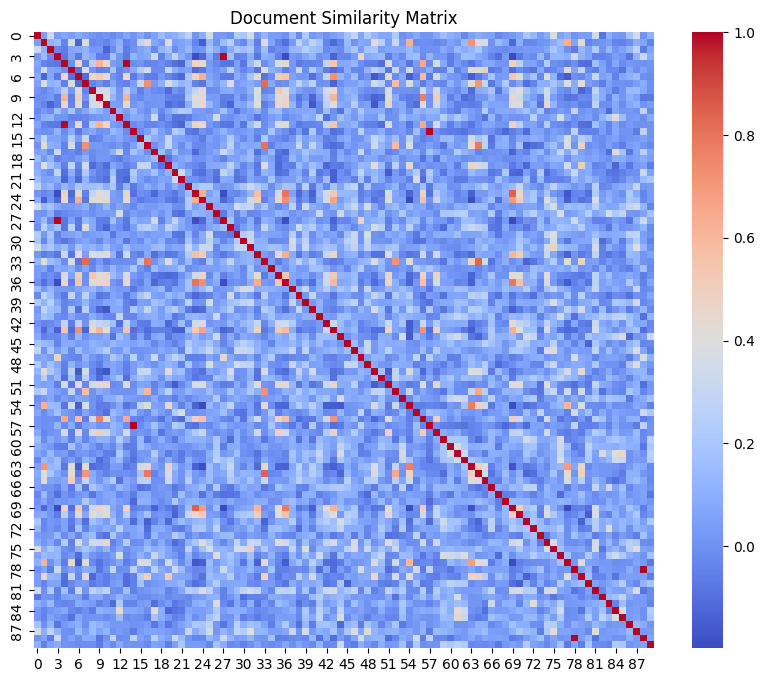

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

similarity_matrix = cosine_similarity(embeddings)
similarity_df = pd.DataFrame(similarity_matrix)
print(similarity_df)

plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, annot=False, cmap='coolwarm')
plt.title('Document Similarity Matrix')
plt.show()

In [10]:
print(f'Number of filenames: {len(filenames)}')
print(f'Number of labels: {len(labels)}')
filenames.remove(file)
print(len(filenames))

Number of filenames: 91
Number of labels: 90
90


In [11]:
import pandas as pd

output_df = pd.DataFrame({
    'filename': filenames,
    'category': labels
})

output_df.to_csv('document_clusters.csv', index=False)